# Project 1: SAT & ACT Analysis

## Problem Statement

SAT and ACT are two of the most widely accepted standard test used in college in United States. The perceptions is that either student would take certain test to apply for college they intended go. Investigate the correlation among the data for both test in year 2017 and 2018 by study the trends that present in the data.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat_2017 = pd.read_csv('../data/sat_2017.csv')

act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

> **Answer:**<br>
The data sets for SAT and ACT scores are listed according to the states in the United States of America. ACT scores are based on English, Math, Reading and Science while SAT scores are based on Math and Evidence-based Reading and Writing.

#### 4a. Does the data look complete? 

>**Answer:**<br> 
By observing the table shown, the data looks complete. However, this would be further evaluated. Participation rates are in string types, and we might need to convert to float to have further analysis.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

>**Answer:**<br>
The ACT composite score has under Wyoming has a value inconsistent with the other states. The total score for SAT has some discrepancies, ranging from -1 to 472.

>The minimum possible value for the total SAT score is 400 and the maximum is 1600. The minmium possible value for each section in the SAT is 200 while the maximum is 800.

>The minimum possible value for each section in the ACT is 1 and the maximum value is 36.

>https://collegereadiness.collegeboard.org/sat/scores/understanding-scores/structure

>https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

**There are errors spotted as below:**
- ACT_2017 Composite also shows 20.2X, should be remove and change to float.
- SAT_2017 Math should not be lesser than 200 for State Maryland, the math is just 52 only.
- ACT_2017 Science for state Maryland should be 23.2 instead of 2.3.**


In [5]:
# act_2017.info()
# act_2017['Composite'] = act_2017['Composite'].astype(float)

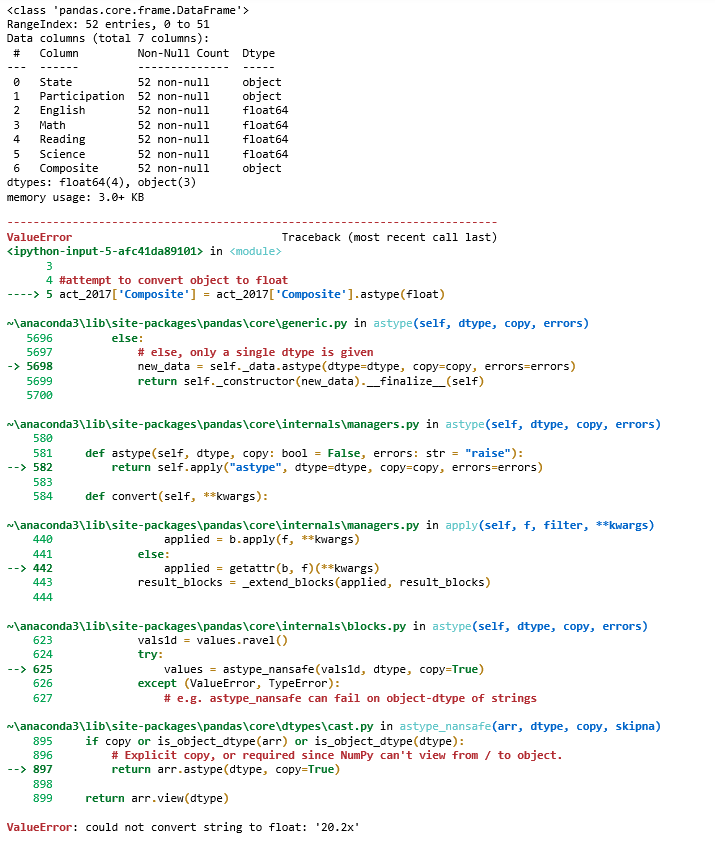

>Unable to convert the string to because of 20.2x in Composite as value error shown above. Now we need to replace the 20.2x to float value.

In [6]:
act_2017['Composite'] =='20.2x' #Value 20.2x at row 51 at column 'composite'

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51     True
Name: Composite, dtype: bool

In [7]:
act_2017.iloc[[51]] #Row 51

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


In [8]:
act_2017.iloc[51,6] = (act_2017.iloc[51][2] + act_2017.iloc[51][3] + act_2017.iloc[51][4] + act_2017.iloc[51][5])/4

act_2017.iloc[[51]] #Re-calculate by taking average of English, Math,Reading & Science 

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.15


In [9]:
# From the sat_2017 csv, there is a column that the math is just 52.
display(sat_2017[sat_2017["Math"]<200])

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [10]:
# Locate the wrong math score and replace it with the correct score
sat_2017.iloc[20, sat_2017.columns.get_loc("Math")] = 524

In [11]:
# verify the changes
sat_2017.iloc[20,:]

State                                 Maryland
Participation                              69%
Evidence-Based Reading and Writing         536
Math                                       524
Total                                     1060
Name: 20, dtype: object

In [12]:
# Locate the state with wrong science score which is Maryland in this case.
act_2017[(act_2017.State=='Maryland')]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [13]:
# Locate the wrong science score and replace it with the correct score
act_2017.iloc[21, act_2017.columns.get_loc("Science")] = 23.2

In [14]:
# verify the changes
act_2017.iloc[21,:]

State            Maryland
Participation         28%
English              23.3
Math                 23.1
Reading              24.2
Science              23.2
Composite            23.6
Name: 21, dtype: object

#### 5. What are your data types? 
Display the data types of each feature. 

In [15]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [16]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [17]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [18]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

>**Answer:** <br>
The participation and composite scores in the file act_2017 should be float value instead of object. While for file sat_2017, the participation rate should be float instead of object.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [19]:
# removing % from the 'Participation' column
def remove_percent(x):
    return float(x.strip('%'))/100

In [20]:
act_2017['Participation'] = act_2017['Participation'].map(remove_percent)

act_2017

,State,Participation,English,Math,Reading,Science,Composite
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8
6,Colorado,1.00,20.1,20.3,21.2,20.9,20.8
7,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2
8,Delaware,0.18,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2


In [21]:
sat_2017['Participation'] = sat_2017['Participation'].map(remove_percent)

sat_2017

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080
2,Arizona,0.30,563,553,1116
3,Arkansas,0.03,614,594,1208
4,California,0.53,531,524,1055
5,Colorado,0.11,606,595,1201
6,Connecticut,1.00,530,512,1041
7,Delaware,1.00,503,492,996
8,District of Columbia,1.00,482,468,950
9,Florida,0.83,520,497,1017


In [22]:
# Converting 'Composite' of file act_2017 from object to float
act_2017['Composite'] = act_2017['Composite'].astype(float)

In [23]:
# Now, check the data type to be the appropriate one.
display(sat_2017.dtypes)
display(act_2017.dtypes)

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

- Fix any individual values preventing other columns from being the appropriate type.

In [24]:
act_2017.Composite.unique()

array([21.  , 19.2 , 19.8 , 19.7 , 19.4 , 22.8 , 20.8 , 25.2 , 24.1 ,
       24.2 , 21.4 , 19.  , 22.3 , 22.6 , 21.9 , 21.7 , 20.  , 19.5 ,
       24.3 , 23.6 , 25.4 , 21.5 , 18.6 , 20.4 , 20.3 , 17.8 , 25.5 ,
       23.9 , 19.1 , 22.  , 21.8 , 23.7 , 24.  , 18.7 , 20.7 , 23.8 ,
       20.5 , 20.15])

- Finish your data modifications by making sure the columns are now typed appropriately.

In [25]:
# Ensure all the numerical columns to be float
sat_2017['Evidence-Based Reading and Writing'] = sat_2017['Evidence-Based Reading and Writing'].astype(float)
sat_2017['Math'] = sat_2017['Math'].astype(float)
sat_2017['Total'] = sat_2017['Total'].astype(float)

In [26]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object

- Display the data types again to confirm they are correct.

In [27]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [28]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     float64
 3   Math                                51 non-null     float64
 4   Total                               51 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [29]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [30]:
#code
act_2017.rename(columns={act_2017.columns[0]:'state'}, inplace=True)
act_2017.rename(columns={act_2017.columns[1]:'act_participation_2017'}, inplace=True)
act_2017.rename(columns={act_2017.columns[2]:'act_english_2017'}, inplace=True)
act_2017.rename(columns={act_2017.columns[3]:'act_math_2017'}, inplace=True)
act_2017.rename(columns={act_2017.columns[4]:'act_reading_2017'}, inplace=True)
act_2017.rename(columns={act_2017.columns[5]:'act_science_2017'}, inplace=True)
act_2017.rename(columns={act_2017.columns[6]:'act_composite_2017'}, inplace=True)

act_2017.head()

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,National,0.60,20.3,20.7,21.4,21.0,21.0
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4


In [31]:
sat_2017.rename(columns={sat_2017.columns[0]:'state'}, inplace=True)
sat_2017.rename(columns={sat_2017.columns[1]:'sat_participation_2017'}, inplace=True)
sat_2017.rename(columns={sat_2017.columns[2]:'sat_erw_2017'}, inplace=True)
sat_2017.rename(columns={sat_2017.columns[3]:'sat_math_2017'}, inplace=True)
sat_2017.rename(columns={sat_2017.columns[4]:'sat_total_2017'}, inplace=True)

display(sat_2017.head())
display(sat_2017.tail())

,state,sat_participation_2017,sat_erw_2017,sat_math_2017,sat_total_2017
0,Alabama,0.05,593.0,572.0,1165.0
1,Alaska,0.38,547.0,533.0,1080.0
2,Arizona,0.30,563.0,553.0,1116.0
3,Arkansas,0.03,614.0,594.0,1208.0
4,California,0.53,531.0,524.0,1055.0


,state,sat_participation_2017,sat_erw_2017,sat_math_2017,sat_total_2017
46,Virginia,0.65,561.0,541.0,1102.0
47,Washington,0.64,541.0,534.0,1075.0
48,West Virginia,0.14,558.0,528.0,1086.0
49,Wisconsin,0.03,642.0,649.0,1291.0
50,Wyoming,0.03,626.0,604.0,1230.0


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature | Type | Dataset |  Description |
|--------|------|---------|--------------| 
|  state | object| SAT/ACT | The state in which the data collected in America|
|  act_participation_2017 | float| ACT | ACT participation rate by state for year 2017 |
|  act_english_2017 | float| ACT | Mean score of ACT English test for year 2017 |
|  act_math_2017 | float| ACT | Mean score of ACT Math test for year 2017 |
|  act_reading_2017 | float| ACT | Mean score of ACT Reading test for year 2017 |
|  act_science_2017 | float| ACT | Mean score of ACT Science test for year 2017 |
|  act_composite_2017 | float| ACT | Mean score of ACT English, Math, Reading & Science for year 2017 |
|  sat_participation_2017 | float| SAT | SAT participation rate by state for year 2017 |
|  sat_erw_2017 | float| SAT | Mean score of SAT Evidence-Based Reading & Writing (ERW) test for year 2017|
|  sat_math_2017 | float| SAT | Mean score of SAT Math test for year 2017 |
|  sat_total_2017 | float| SAT | Mean composite score of SAT ERW and Math test for year 2017 |


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [32]:
act_2017.drop(0,axis =0,inplace=True) 

In [33]:
act_2017.head()

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [34]:
#Code:
combine_2017 = pd.merge(act_2017, sat_2017, on='state')

In [35]:
combine_2017.head()

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2017,sat_erw_2017,sat_math_2017,sat_total_2017
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593.0,572.0,1165.0
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547.0,533.0,1080.0
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563.0,553.0,1116.0
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614.0,594.0,1208.0
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531.0,524.0,1055.0


In [36]:
combine_2017.shape

(51, 11)

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [37]:
#code
combine_2017.to_csv(r'../data/combine_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [38]:
#importing DataBase from csv files
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018_updated.csv')

In [39]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [40]:
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [41]:
#changing 'Participation' to be a uniform unit (float)
sat_2018['Participation'] = sat_2018['Participation'].map(remove_percent)

In [42]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106
2,Arizona,0.29,577,572,1149
3,Arkansas,0.05,592,576,1169
4,California,0.60,540,536,1076


In [43]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [44]:
#changing all integer columns to be floats
sat_2018['Evidence-Based Reading and Writing'] = sat_2018['Evidence-Based Reading and Writing'].astype(float)
sat_2018['Math'] = sat_2018['Math'].astype(float)
sat_2018['Total'] = sat_2018['Total'].astype(float)


In [45]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [46]:
# removing % from the 'Participation' column
def remove_percent(x):
    return float(x.strip('%'))/100

In [47]:
act_2018['Percentage of Students Tested'] = act_2018['Percentage of Students Tested']/100

In [48]:
#changing Percentage of Studemts Tested columns to be floats
act_2018['Percentage of Students Tested'] = act_2018['Percentage of Students Tested'].astype(float)

In [49]:
#renaming columns
act_2018.rename(columns={act_2018.columns[0]:'state'}, inplace=True)
act_2018.rename(columns={act_2018.columns[1]:'act_participation_2018'}, inplace=True)
act_2018.rename(columns={act_2018.columns[2]:'act_composite_2018'}, inplace=True)
act_2018.rename(columns={act_2018.columns[3]:'act_english_2018'}, inplace=True)
act_2018.rename(columns={act_2018.columns[4]:'act_math_2018'}, inplace=True)
act_2018.rename(columns={act_2018.columns[5]:'act_reading_2018'}, inplace=True)
act_2018.rename(columns={act_2018.columns[6]:'act_science_2018'}, inplace=True)

sat_2018.rename(columns={sat_2018.columns[0]:'state'}, inplace=True)
sat_2018.rename(columns={sat_2018.columns[1]:'sat_participation_2018'}, inplace=True)
sat_2018.rename(columns={sat_2018.columns[2]:'sat_erw_2018'}, inplace=True)
sat_2018.rename(columns={sat_2018.columns[3]:'sat_math_2018'}, inplace=True)
sat_2018.rename(columns={sat_2018.columns[4]:'sat_total_2018'}, inplace=True)

In [50]:
act_2018.head()

,state,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018
0,Alabama,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.27,22.7,22.5,22.5,23.0,22.1


In [51]:
sat_2018.head()

,state,sat_participation_2018,sat_erw_2018,sat_math_2018,sat_total_2018
0,Alabama,0.06,595.0,571.0,1166.0
1,Alaska,0.43,562.0,544.0,1106.0
2,Arizona,0.29,577.0,572.0,1149.0
3,Arkansas,0.05,592.0,576.0,1169.0
4,California,0.60,540.0,536.0,1076.0


In [52]:
#combining SAT and ACT scores of 2018
combine_2018 = pd.merge(act_2018, sat_2018, on='state')

combine_2018.head()

,state,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,sat_participation_2018,sat_erw_2018,sat_math_2018,sat_total_2018
0,Alabama,1.00,19.1,18.9,18.3,19.6,19.0,0.06,595.0,571.0,1166.0
1,Alaska,0.33,20.8,19.8,20.6,21.6,20.7,0.43,562.0,544.0,1106.0
2,Arizona,0.66,19.2,18.2,19.4,19.5,19.2,0.29,577.0,572.0,1149.0
3,Arkansas,1.00,19.4,19.1,18.9,19.7,19.4,0.05,592.0,576.0,1169.0
4,California,0.27,22.7,22.5,22.5,23.0,22.1,0.60,540.0,536.0,1076.0


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [53]:
final = pd.merge(combine_2017, combine_2018, on="state")
final.head()

,state,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2017,sat_erw_2017,sat_math_2017,...,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,sat_participation_2018,sat_erw_2018,sat_math_2018,sat_total_2018
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593.0,572.0,...,1.00,19.1,18.9,18.3,19.6,19.0,0.06,595.0,571.0,1166.0
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547.0,533.0,...,0.33,20.8,19.8,20.6,21.6,20.7,0.43,562.0,544.0,1106.0
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563.0,553.0,...,0.66,19.2,18.2,19.4,19.5,19.2,0.29,577.0,572.0,1149.0
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614.0,594.0,...,1.00,19.4,19.1,18.9,19.7,19.4,0.05,592.0,576.0,1169.0
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531.0,524.0,...,0.27,22.7,22.5,22.5,23.0,22.1,0.60,540.0,536.0,1076.0


In [54]:
final.to_csv(r'../data/final.csv')

## Final Dataframe of Data Dictionary

|Feature | Type | Dataset |  Description |
|--------|------|---------|--------------| 
|  state | object| SAT/ACT | The state in which the data collected in America|
|  act_participation_2017 | float| ACT | ACT participation rate by state for year 2017 |
|  act_english_2017 | float| ACT | Mean score of ACT English test for year 2017 |
|  act_math_2017 | float| ACT | Mean score of ACT Math test for year 2017 |
|  act_reading_2017 | float| ACT | Mean score of ACT Reading test for year 2017 |
|  act_science_2017 | float| ACT | Mean score of ACT Science test for year 2017 |
|  act_composite_2017 | float| ACT | Mean score of ACT English, Math, Reading & Science for year 2017 |
|  sat_participation_2017 | float| SAT | SAT participation rate by state for year 2017 |
|  sat_erw_2017 | float| SAT | Mean score of SAT Evidence-Based Reading & Writing (ERW) test for year 2017|
|  sat_math_2017 | float| SAT | Mean score of SAT Math test for year 2017 |
|  sat_total_2017 | float| SAT | Mean composite score of SAT ERW and Math test for year 2017 |
|  act_participation_2018 | float| ACT | ACT participation rate by state for year 2018 |
|  act_english_2018 | float| ACT | Mean score of ACT English test for year 2018 |
|  act_math_2018 | float| ACT | Mean score of ACT Math test for year 2018 |
|  act_reading_2018 | float| ACT | Mean score of ACT Reading test for year 2018 |
|  act_science_2018 | float| ACT | Mean score of ACT Science test for year 2018 |
|  act_composite_2018 | float| ACT | Mean score of ACT English, Math, Reading & Science for year 2018 |
|  sat_participation_2018 | float| SAT | SAT participation rate by state for year 2018 |
|  sat_erw_2018 | float| SAT | Mean score of SAT Evidence-Based Reading & Writing (ERW) test for year 2018|
|  sat_math_2018 | float| SAT | Mean score of SAT Math test for year 2018 |
|  sat_total_2018 | float| SAT | Mean composite score of SAT ERW and Math test for year 2018 |

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [55]:
#Code:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
act_participation_2017,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_english_2017,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_math_2017,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_reading_2017,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_science_2017,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
act_composite_2017,51.0,21.518627,2.021360,17.80,19.800,21.40,23.600,25.5
sat_participation_2017,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_erw_2017,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_math_2017,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [56]:
#code
#std = sqrt(mean(abs(x - x. mean())**2))

def std_dev( data ):
    n = len(data)
    mean = sum(data)/n
    x = 0
    
    for i in data:
        x += (i-mean)**2
        var = x/n
        std = var**0.5
    return std

In [57]:
std_dev(final['sat_total_2017'])

91.58351056778743

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [58]:
sd=dict(final.select_dtypes(exclude=object).apply(std_dev))
sd

{'act_participation_2017': 0.3182417575123181,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 1.7222161451443676,
 'act_composite_2017': 2.001444595548517,
 'sat_participation_2017': 0.3492907076664507,
 'sat_erw_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485503,
 'sat_total_2017': 91.58351056778743,
 'act_participation_2018': 0.33745194881997503,
 'act_composite_2018': 2.0855261815801147,
 'act_english_2018': 2.4222536143202795,
 'act_math_2018': 2.015707255555717,
 'act_reading_2018': 2.145891884510421,
 'act_science_2018': 1.8516885484833543,
 'sat_participation_2018': 0.3694661922353942,
 'sat_erw_2018': 47.03460978357609,
 'sat_math_2018': 47.30194550378352,
 'sat_total_2018': 93.22742384464433}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [59]:
np.std(final)

act_participation_2017     0.318242
act_english_2017           2.330488
act_math_2017              1.962462
act_reading_2017           2.046903
act_science_2017           1.722216
act_composite_2017         2.001445
sat_participation_2017     0.349291
sat_erw_2017              45.216970
sat_math_2017             46.657134
sat_total_2017            91.583511
act_participation_2018     0.337452
act_composite_2018         2.085526
act_english_2018           2.422254
act_math_2018              2.015707
act_reading_2018           2.145892
act_science_2018           1.851689
sat_participation_2018     0.369466
sat_erw_2018              47.034610
sat_math_2018             47.301946
sat_total_2018            93.227424
dtype: float64

>**Answer:**<br>
Comparing the manual calculation and numpy calculation of standard deviation, the values are very close. The output of numpy have lesser decimal which the last decimal point was round up comparing to manual calculation.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

## States with highest SAT participation rates

**SAT Participation Year 2017**

In [60]:
# top 10 highest participation for SAT year 2017
final[['state','sat_participation_2017']].sort_values(('sat_participation_2017'),ascending = False).head(10)

,state,sat_participation_2017
8,District of Columbia,1.00
22,Michigan,1.00
6,Connecticut,1.00
7,Delaware,1.00
29,New Hampshire,0.96
19,Maine,0.95
12,Idaho,0.93
9,Florida,0.83
21,Massachusetts,0.76
39,Rhode Island,0.71


**SAT Participation Year 2018**

In [61]:
# top 10 highest participation for SAT year 2018
final[['state','sat_participation_2018']].sort_values(('sat_participation_2018'),ascending = False).head(10)

,state,sat_participation_2018
5,Colorado,1.00
6,Connecticut,1.00
7,Delaware,1.00
22,Michigan,1.00
12,Idaho,1.00
19,Maine,0.99
13,Illinois,0.99
39,Rhode Island,0.97
29,New Hampshire,0.96
8,District of Columbia,0.92


## States with lowest SAT participation rates

**SAT Participation Year 2017**

In [62]:
# top 10 lowest participation for SAT year 2017
final[['state','sat_participation_2017']].sort_values(('sat_participation_2017'),ascending = True).head(10)

,state,sat_participation_2017
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03
23,Minnesota,0.03
50,Wyoming,0.03


**SAT Participation Year 2018**

In [63]:
# top 10 lowest participation for SAT year 2018
final[['state','sat_participation_2018']].sort_values(('sat_participation_2018'),ascending = True).head(10)

,state,sat_participation_2018
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03
24,Mississippi,0.03
15,Iowa,0.03
44,Utah,0.04
23,Minnesota,0.04
18,Louisiana,0.04


## States with highest ACT participation rates

**ACT Participation Year 2017**

In [64]:
# top 20 highest participation for ACT year 2017 
final[['state','act_participation_2017']].sort_values(('act_participation_2017'),ascending = False).head(20)

,state,act_participation_2017
0,Alabama,1.00
17,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
40,South Carolina,1.00
36,Oklahoma,1.00
33,North Carolina,1.00
28,Nevada,1.00
26,Montana,1.00


**ACT Participation Year 2018**

In [65]:
# top 20 highest participation for ACT year 2018
final[['state','act_participation_2018']].sort_values(('act_participation_2018'),ascending = False).head(20)

,state,act_participation_2018
0,Alabama,1.00
17,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
40,South Carolina,1.00
36,Oklahoma,1.00
35,Ohio,1.00
33,North Carolina,1.00
28,Nevada,1.00


## States with lowest ACT participation rates

**ACT Participation Year 2017**

In [66]:
# top 20 lowest participation for ACT year 2017
final[['state','act_participation_2017']].sort_values(('act_participation_2017'),ascending = True).head(20)

,state,act_participation_2017
19,Maine,0.08
29,New Hampshire,0.18
7,Delaware,0.18
39,Rhode Island,0.21
38,Pennsylvania,0.23
20,Maryland,0.28
45,Vermont,0.29
21,Massachusetts,0.29
22,Michigan,0.29
46,Virginia,0.29


**SAT Participation Year 2018**

In [67]:
# top 20 lowest participation for ACT year 2018
final[['state','act_participation_2018']].sort_values(('act_participation_2018'),ascending = True).head(20)

,state,act_participation_2018
19,Maine,0.07
39,Rhode Island,0.15
29,New Hampshire,0.16
7,Delaware,0.17
38,Pennsylvania,0.20
22,Michigan,0.22
47,Washington,0.24
45,Vermont,0.24
46,Virginia,0.24
21,Massachusetts,0.25


## States with highest  SAT Total Scores

**SAT Total Scores Year 2017**

In [68]:
# top 10 states with highest total scores year 2017
final[['state','sat_participation_2017','sat_total_2017']].sort_values(('sat_total_2017'),ascending = False).head(10)

,state,sat_participation_2017,sat_total_2017
23,Minnesota,0.03,1295.0
49,Wisconsin,0.03,1291.0
15,Iowa,0.02,1275.0
25,Missouri,0.03,1271.0
16,Kansas,0.04,1260.0
34,North Dakota,0.02,1256.0
27,Nebraska,0.03,1253.0
17,Kentucky,0.04,1247.0
24,Mississippi,0.02,1242.0
44,Utah,0.03,1238.0


**SAT Total Scores Year 2018**

In [69]:
# top 10 states with highest total scores year 2018
final[['state','sat_participation_2018','sat_total_2018']].sort_values(('sat_total_2018'),ascending = False).head(10)

,state,sat_participation_2018,sat_total_2018
23,Minnesota,0.04,1298.0
49,Wisconsin,0.03,1294.0
34,North Dakota,0.02,1283.0
15,Iowa,0.03,1265.0
16,Kansas,0.04,1265.0
25,Missouri,0.04,1262.0
50,Wyoming,0.03,1257.0
27,Nebraska,0.03,1252.0
17,Kentucky,0.04,1248.0
41,South Dakota,0.03,1240.0


## States with lowest SAT Total Scores

**SAT Total Scores Year 2017**

In [70]:
# top 10 states with lowest total scores year 2017
final[['state','sat_participation_2017','sat_total_2017']].sort_values(('sat_total_2017'),ascending = True).head(10)

,state,sat_participation_2017,sat_total_2017
8,District of Columbia,1.00,950.0
7,Delaware,1.00,996.0
12,Idaho,0.93,1005.0
22,Michigan,1.00,1005.0
19,Maine,0.95,1012.0
9,Florida,0.83,1017.0
43,Texas,0.62,1020.0
6,Connecticut,1.00,1041.0
36,Oklahoma,0.07,1047.0
10,Georgia,0.61,1050.0


**SAT Total Scores Year 2018**

In [71]:
# top 10 states with lowest total scores year 2018
final[['state','sat_participation_2018','sat_total_2018']].sort_values(('sat_total_2018'),ascending = True).head(10)

,state,sat_participation_2018,sat_total_2018
8,District of Columbia,0.92,977.0
7,Delaware,1.00,998.0
48,West Virginia,0.28,999.0
12,Idaho,1.00,1001.0
44,Utah,0.04,1010.0
11,Hawaii,0.56,1010.0
22,Michigan,1.00,1011.0
19,Maine,0.99,1013.0
39,Rhode Island,0.97,1018.0
13,Illinois,0.99,1019.0


## States with highest  ACT Composite Scores

**ACT Composite Scores Year 2017**

In [72]:
# top 10 states with highest composite scores year 2017
final[['state','act_participation_2017','act_composite_2017']].sort_values(('act_composite_2017'),ascending = False).head(10)

,state,act_participation_2017,act_composite_2017
29,New Hampshire,0.18,25.5
21,Massachusetts,0.29,25.4
6,Connecticut,0.31,25.2
19,Maine,0.08,24.3
8,District of Columbia,0.32,24.2
32,New York,0.31,24.2
22,Michigan,0.29,24.1
7,Delaware,0.18,24.1
39,Rhode Island,0.21,24.0
30,New Jersey,0.34,23.9


**ACT Composite Scores Year 2018**

In [73]:
# top 10 states with highest composite scores year 2018
final[['state','act_participation_2018','act_composite_2018']].sort_values(('act_composite_2018'),ascending = False).head(10)

,state,act_participation_2018,act_composite_2018
6,Connecticut,0.26,25.6
21,Massachusetts,0.25,25.5
29,New Hampshire,0.16,25.1
32,New York,0.27,24.5
22,Michigan,0.22,24.4
39,Rhode Island,0.15,24.2
45,Vermont,0.24,24.1
19,Maine,0.07,24.0
46,Virginia,0.24,23.9
5,Colorado,0.30,23.9


## States with 100% participation on a given test having rate changes

**SAT 2017 & SAT 2018**

In [74]:
sat_rt_chg = (final[(final['sat_participation_2017']==1) & (final['sat_participation_2018']!=1)][['state','sat_participation_2017','sat_participation_2018']])
sat_rt_chg

,state,sat_participation_2017,sat_participation_2018
8,District of Columbia,1.0,0.92


Most of the state with 100% SAT participation rate in year 2017 having same participation rate in eyar 2018 except District of Columbia which having 100% participation rate in year 2017 and dropped to 92% in year 2018.

**ACT 2017 & ACT 2018**

In [75]:
act_rt_chg = (final[(final['act_participation_2017']==1) & (final['act_participation_2018']!=1)][['state','act_participation_2017','act_participation_2018']])
act_rt_chg

,state,act_participation_2017,act_participation_2018
5,Colorado,1.0,0.30
23,Minnesota,1.0,0.99


>Most of the state with 100% ACT participation rate in year 2017 having same participation rate in eyar 2018 except Colorado which having 100% participation rate in year 2017 dropped to 30% participation rate in year 2018, and Minnesota which having 100% participation rate in year 2017 have a slight drop to 99% participation rate in year 2018.

## States that having above 50% participation rate on both test either year

**Participation rate one both test Year 2017**

In [76]:
yr17_fpt = (final[(final['act_participation_2017'] > 0.5) & (final['sat_participation_2017'] >0.5)][['state','act_participation_2017','sat_participation_2017']])
yr17_fpt

,state,act_participation_2017,sat_participation_2017
9,Florida,0.73,0.83
10,Georgia,0.55,0.61
11,Hawaii,0.90,0.55


**Participation rate one both test Year 2018**

In [77]:
yr18_fpt = (final[(final['act_participation_2018'] > 0.5) & (final['sat_participation_2018'] >0.5)][['state','act_participation_2018','sat_participation_2018']])
yr18_fpt

,state,act_participation_2018,sat_participation_2018
9,Florida,0.66,0.56
10,Georgia,0.53,0.70
11,Hawaii,0.89,0.56
33,North Carolina,1.00,0.52
40,South Carolina,1.00,0.55


In [78]:
Yr17_fifty =  final.mask((final['sat_participation_2017'] > 0.5) & (final['act_participation_2017'] > 0.5))[['state','sat_participation_2017','act_participation_2017']]
Yr17_fifty

,state,sat_participation_2017,act_participation_2017
0,Alabama,0.05,1.00
1,Alaska,0.38,0.65
2,Arizona,0.30,0.62
3,Arkansas,0.03,1.00
4,California,0.53,0.31
5,Colorado,0.11,1.00
6,Connecticut,1.00,0.31
7,Delaware,1.00,0.18
8,District of Columbia,1.00,0.32
9,NaN,NaN,NaN


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

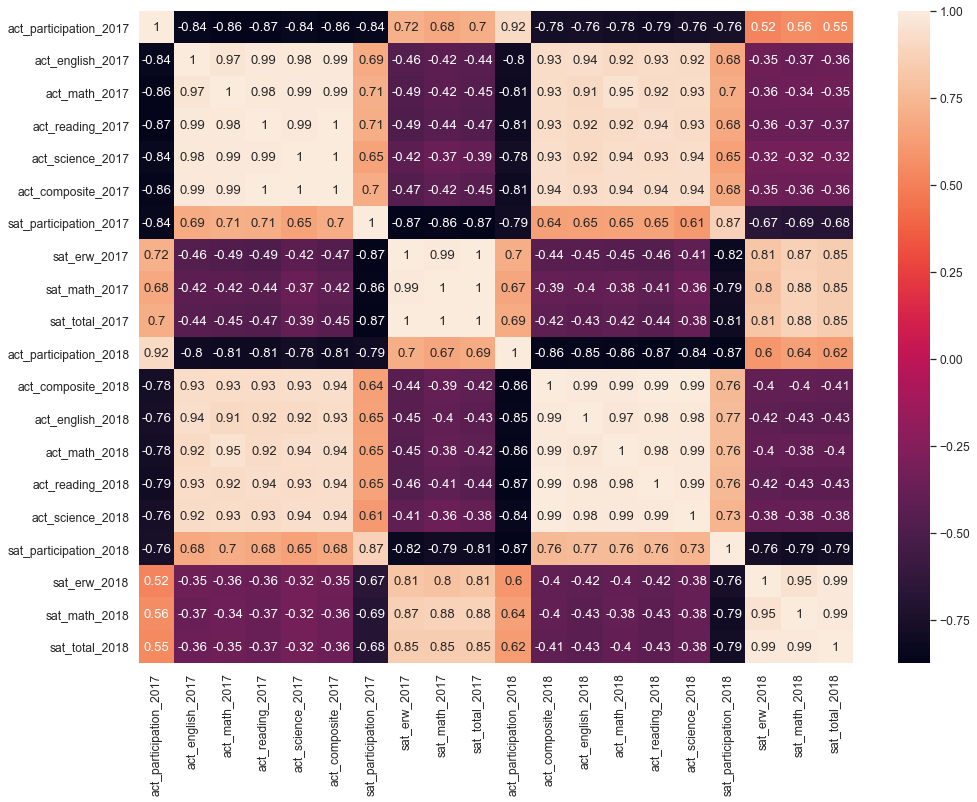

In [79]:
import seaborn as sns
sns.set(font_scale=1.1)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,12)) 
sns.heatmap(final.corr(),annot=True);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [80]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(14,14)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        colors = ['cornflowerblue']
        ax[i].hist(dataframe[column],color=colors) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i],fontsize=20)
        ax[i].set_xlabel(list_of_xlabels[i],fontsize=15)
        ax[i].set_ylabel('Number of States',fontsize=15)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

## Participation Rates for SAT & ACT

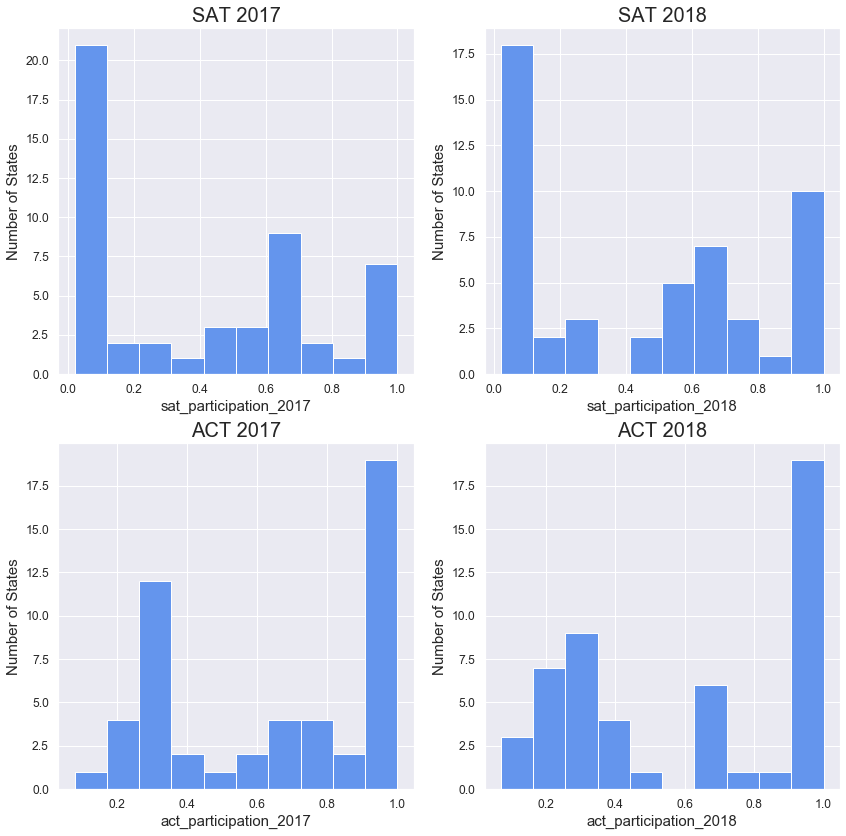

In [81]:
list_of_columns = ['sat_participation_2017','sat_participation_2018','act_participation_2017','act_participation_2018']

list_of_titles = ['SAT 2017','SAT 2018','ACT 2017','ACT 2018']

list_of_xlabels = [i for i in list_of_columns]  

subplot_histograms(final,list_of_columns,list_of_titles,list_of_xlabels)

>**Analysis :**<br>
From the table above, comparing the states having 100% participation in ACT and SAT test, ACT participation is higher than SAT for both year 2017 & 2018.

>By comparing both test year 2017 to 2018, states which having 100% participation in both ACT and SAT test were increasing. Refer to the [link](https://www.washingtonpost.com/education/2018/10/23/sat-reclaims-title-most-widely-used-college-admission-test/?noredirect=on), the SAT had reclaimed the title of most widely used as college admission test for the first time since year 2012.

## Math Scores for SAT & ACT

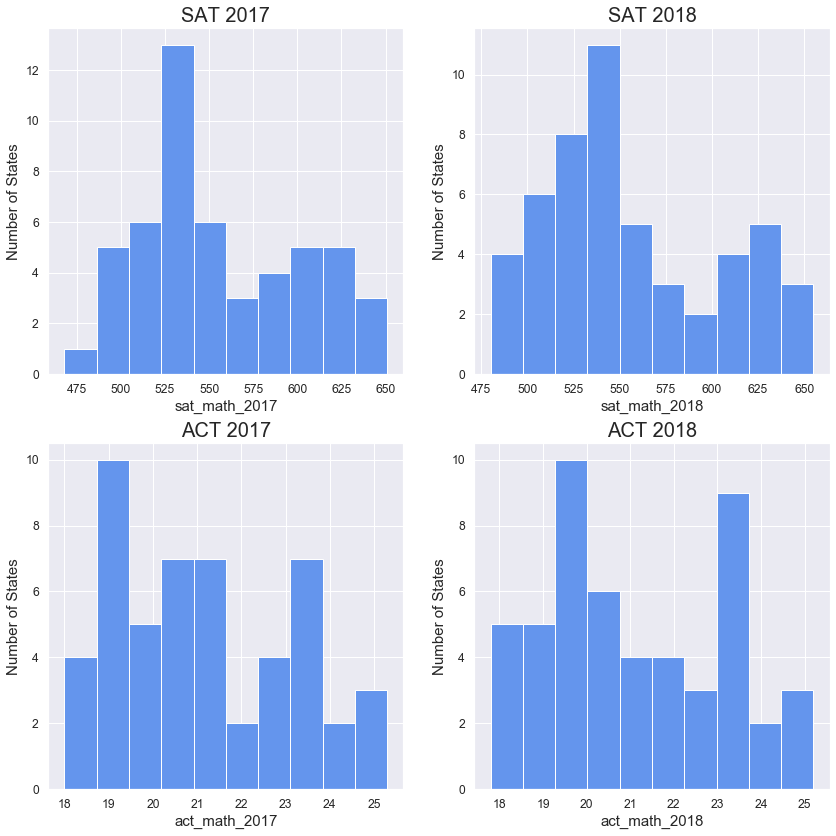

In [82]:
list_of_columns = ['sat_math_2017','sat_math_2018','act_math_2017','act_math_2018']

list_of_titles = ['SAT 2017','SAT 2018','ACT 2017','ACT 2018']

list_of_xlabels = [i for i in list_of_columns]  

subplot_histograms(final,list_of_columns,list_of_titles,list_of_xlabels)

>**Analysis :**<br>
By refering the table above,it appears no obvious changes for both math test comparing year 2017 to year 2018.
SAT test having more uniform distributed pattern comparing to ACT test, however these were to be analyze in depth via other plottings to have a more accurate conclusion.

## Reading/Verbal Scores for SAT & ACT

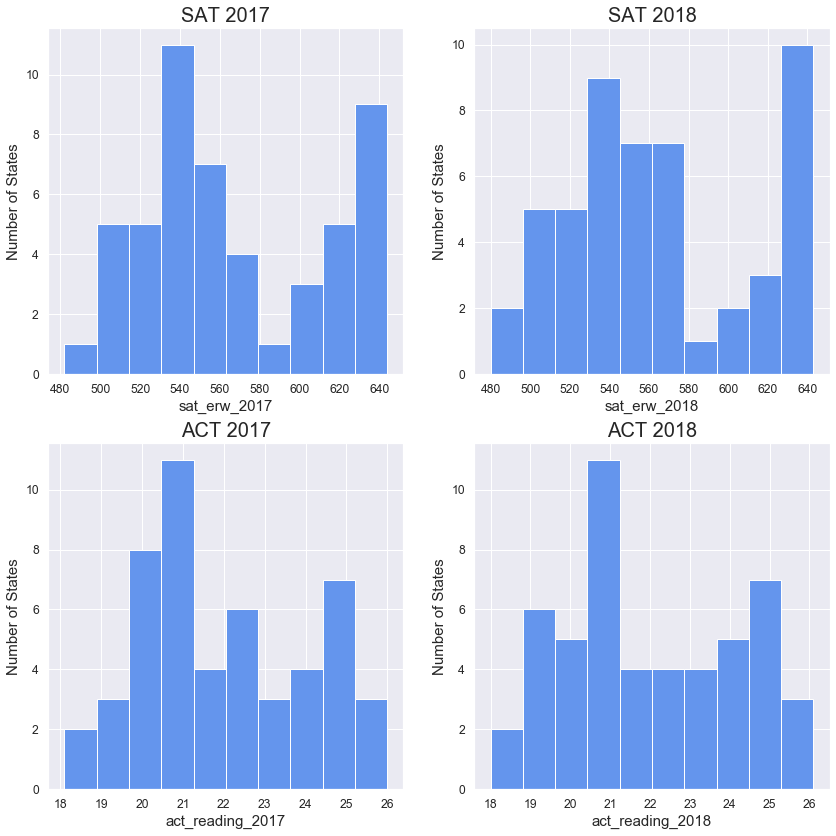

In [83]:
list_of_columns = ['sat_erw_2017','sat_erw_2018','act_reading_2017','act_reading_2018']

list_of_titles = ['SAT 2017','SAT 2018','ACT 2017','ACT 2018']

list_of_xlabels = [i for i in list_of_columns]  

subplot_histograms(final,list_of_columns,list_of_titles,list_of_xlabels)

>**Analysis :**<br>
By refering the table above,again it appears there is no obvious changes in scores in reading and writing test for both ACT and SAT test. But notably that the SAT test have more high scorers than ACT test from above visualization however, more in depth analyzation is required to have accurate conclusion.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


## SAT vs ACT Math Scores Year 2017

Text(0, 0.5, 'SAT Math 2017')

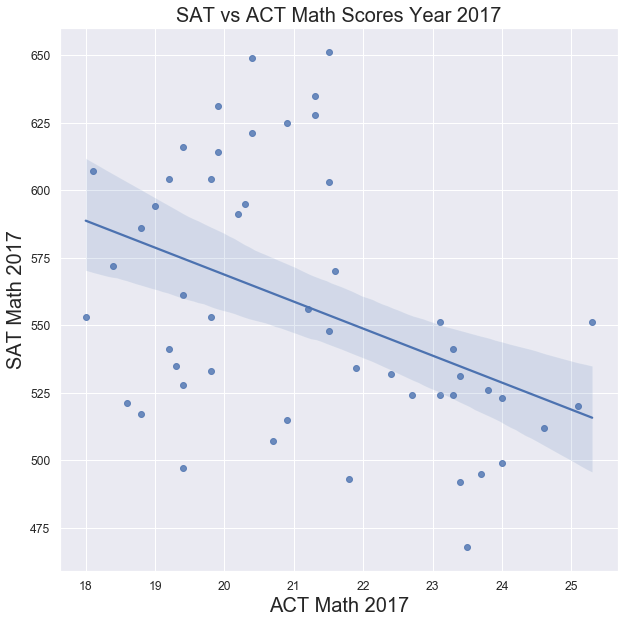

In [84]:
ax = plt.subplots(figsize=(10,10))
ax = sns.regplot(y='sat_math_2017', x='act_math_2017', data=final[['sat_math_2017','act_math_2017']])
ax.set_title('SAT vs ACT Math Scores Year 2017',fontsize=20)
ax.set_xlabel('ACT Math 2017',fontsize=20)
ax.set_ylabel('SAT Math 2017',fontsize=20)

>**Analysis :**<br>
From scatter plot above comparing ACT & SAT math scores, it appear the slope is going downward.Which means, the state scoring better scores in SAT math than ACT math or the other way round. This is beause probably either ACT or SAT test is the main requirement in different state. The states tends to be more focus in ACT test if the ACT is the main requirement or vice versa.


## SAT vs ACT Evidence-Based Reading & Writing Scores Year 2017

Text(0, 0.5, 'SAT Reading & Writing 2017')

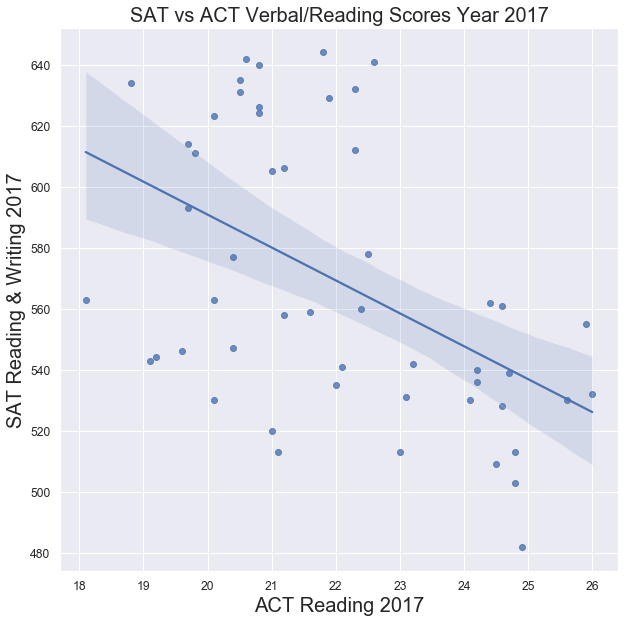

In [85]:
ax = plt.subplots(figsize=(10,10))
ax = sns.regplot(y='sat_erw_2017', x='act_reading_2017', data=final[['sat_erw_2017','act_reading_2017']])
ax.set_title('SAT vs ACT Verbal/Reading Scores Year 2017',fontsize=20)
ax.set_xlabel('ACT Reading 2017',fontsize=20)
ax.set_ylabel('SAT Reading & Writing 2017',fontsize=20)

>**Analysis :**<br>
From scatter plot above comparing ACT & SAT verbal and reading scores, it appear the slope is going downward as identical as the math scores. The reason is probably the same with the math score plot as the state is either taking ACT or SAT test as main requirement.


## SAT vs ACT Total / Composite Scores Year 2017

Text(0, 0.5, 'SAT Total Score 2017')

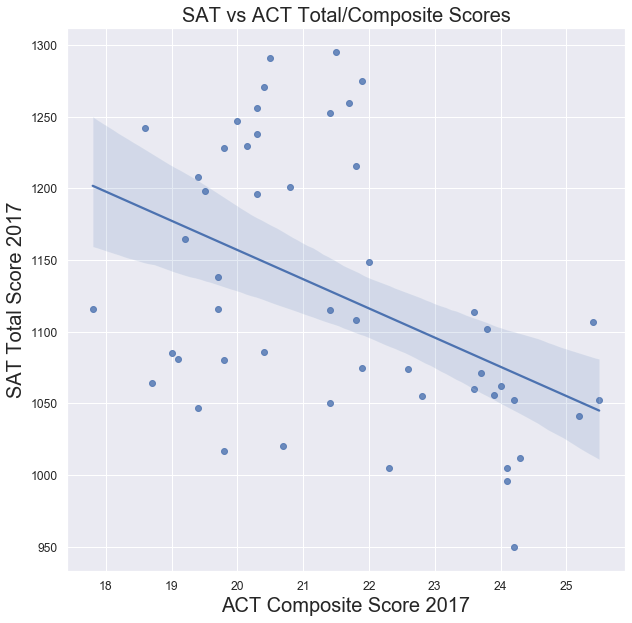

In [86]:
ax = plt.subplots(figsize=(10,10))
ax = sns.regplot(y='sat_total_2017', x='act_composite_2017', data=final[['sat_total_2017','act_composite_2017']])
ax.set_title('SAT vs ACT Total/Composite Scores',fontsize=20)
ax.set_xlabel('ACT Composite Score 2017',fontsize=20)
ax.set_ylabel('SAT Total Score 2017',fontsize=20)

>**Analysis :**<br>
From scatter plot above comparing ACT & SAT total and composite scores, it appear the slope is going downward as identical as the math and reading scores above. The reason were stated above which either ACT or SAT test is the requirement of the particular state.


## SAT Total Scores Year 2017 vs Year 2018

Text(0, 0.5, 'SAT Total 2017')

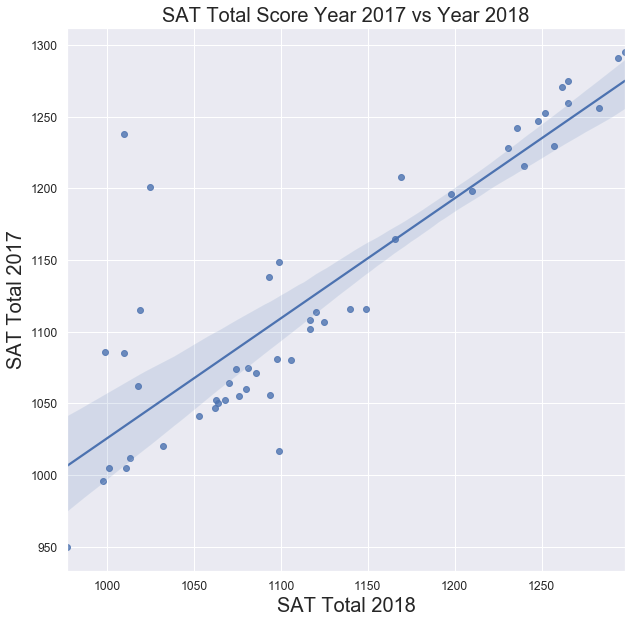

In [87]:
ax = plt.subplots(figsize=(10,10))
ax = sns.regplot(y='sat_total_2017', x='sat_total_2018', data=final[['sat_total_2017','sat_total_2018']])
ax.set_title('SAT Total Score Year 2017 vs Year 2018',fontsize=20)
ax.set_xlabel('SAT Total 2018',fontsize=20)
ax.set_ylabel('SAT Total 2017',fontsize=20)

>**Analysis :**<br>
The SAT total score from year 2017 to 2018 forming a linear trend, mean that the states having to score identical comparing with previous year.There are several points below the liner line, mean that the particular state was having score drop in year 2018.<br>
<br>
Majority of the states did not have significant improvement which lied near to the trend line.



Text(0, 0.5, 'ACT Composite 2017')

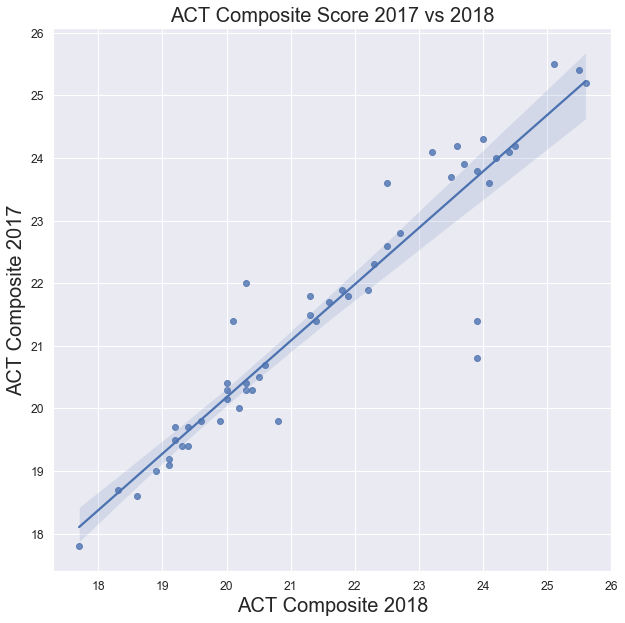

In [88]:
ax = plt.subplots(figsize=(10,10))
ax = sns.regplot(y='act_composite_2017', x='act_composite_2018', data=final[['act_composite_2017','act_composite_2018']])
ax.set_title('ACT Composite Score 2017 vs 2018',fontsize=20)
ax.set_xlabel('ACT Composite 2018',fontsize=20)
ax.set_ylabel('ACT Composite 2017',fontsize=20)

>**Analysis :**<br>
The ACT composite score from year 2017 to 2018 forming a linear trend simlar to SAT ,showing that the states having to score identical comparing with previous year.However there is no states dropped significantly below the trend line and more states having improvement appearing on the trend line.<br>



#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

## SAT Scores

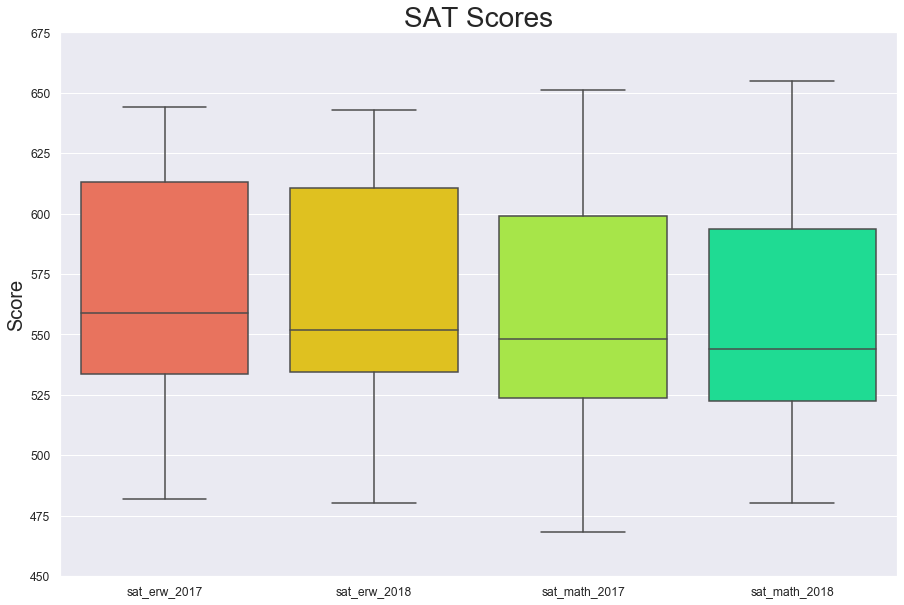

In [89]:
ax = plt.subplots(figsize=(15,10))
plt.title('SAT Scores',fontsize=28)
plt.ylabel('Score',fontsize=20)
plt.ylim(450, 675)
box_col = {'sat_erw_2017': 'tomato', 'sat_erw_2018': 'gold', 'sat_math_2017': 'greenyellow', 'sat_math_2018':'mediumspringgreen'}
sns.boxplot(data=final[['sat_erw_2017','sat_erw_2018','sat_math_2017','sat_math_2018']],width=0.8,palette=box_col);

>**Analysis :**<br>
The SAT reading and writing scores is better than math for both years, but both the subject have visible performance drop of by looking at the lowering of meadian line for reading and writing, while math maintining consistent performance over this 2 years with lesser dip and almost interquartile range.



## ACT Scores

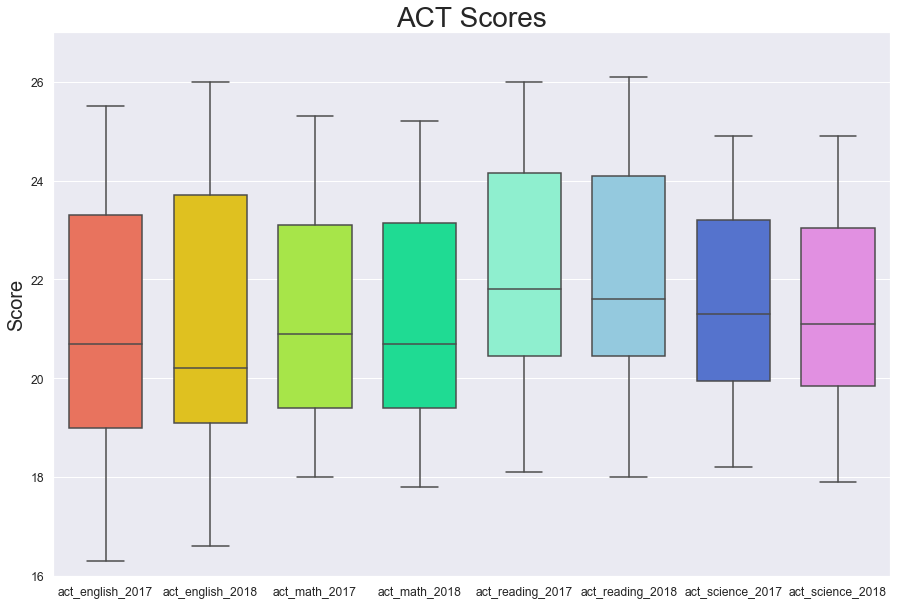

In [90]:
ax = plt.subplots(figsize=(15,10))
plt.title('ACT Scores',fontsize=28)
plt.ylabel('Score',fontsize=20)
plt.ylim(16, 27)
box_col = {'act_english_2017': 'tomato', 'act_english_2018': 'gold', 'act_math_2017': 'greenyellow', 'act_math_2018':'mediumspringgreen', 'act_reading_2017':'aquamarine', 'act_reading_2018':'skyblue', 'act_science_2017':'royalblue', 'act_science_2018':'violet'}
sns.boxplot(data=final[['act_english_2017','act_english_2018','act_math_2017','act_math_2018','act_reading_2017','act_reading_2018','act_science_2017','act_science_2018']],width=0.7,palette=box_col);

>**Analysis :**<br>
Again, the students appear to having better performance in reading with higher median and maximum for both years comparing to other subjects. However english was lower than reading even though it is about the language ability of student.<br>
<br>
The overall performance having slight dip in median and maximum compating year 2017 to 2018.



#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

## SAT vs ACT Participation Rate

From the scatter plot above, we can see that the states were take either 1 of SAT or ACT as their main requirement test. So we can see which test is more prefered for each of the states by comparing them as below.<br>
**SAT Total Scores Year 2017 & Year 2018**

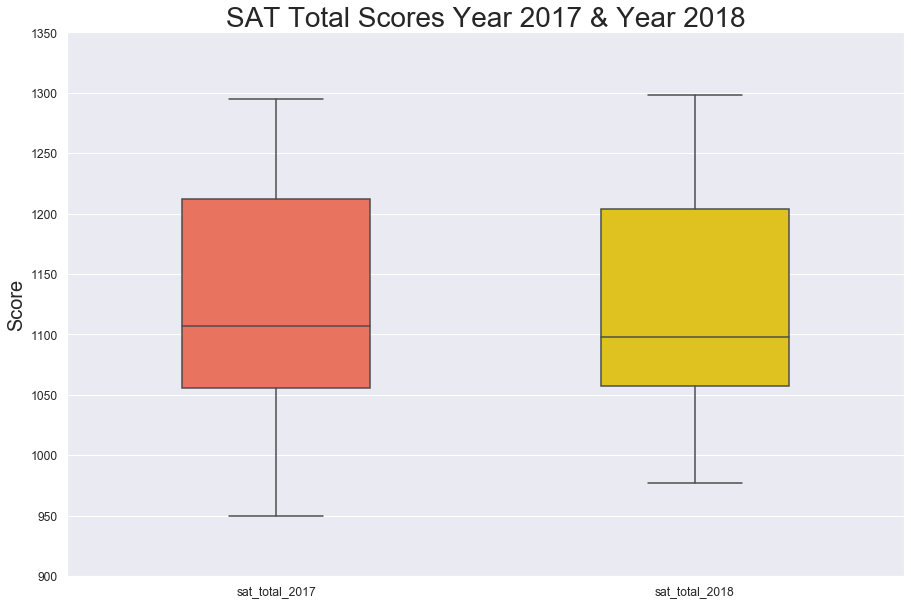

In [91]:
ax = plt.subplots(figsize=(15,10))
plt.title('SAT Total Scores Year 2017 & Year 2018',fontsize=28)
plt.ylabel('Score',fontsize=20)
plt.ylim(900, 1350)
box_col = {'sat_total_2017': 'tomato', 'sat_total_2018': 'gold'}
sns.boxplot(data=final[['sat_total_2017','sat_total_2018']],width=0.45,palette=box_col);

>**Analysis :**<br>
Comparing the SAT total scores year 2017 and year 2018, the 25th percentile, 75th percentile and maximum scores were increased slightly, however the median dipped a little comparing to previous year (year 2017)<br>
<br>


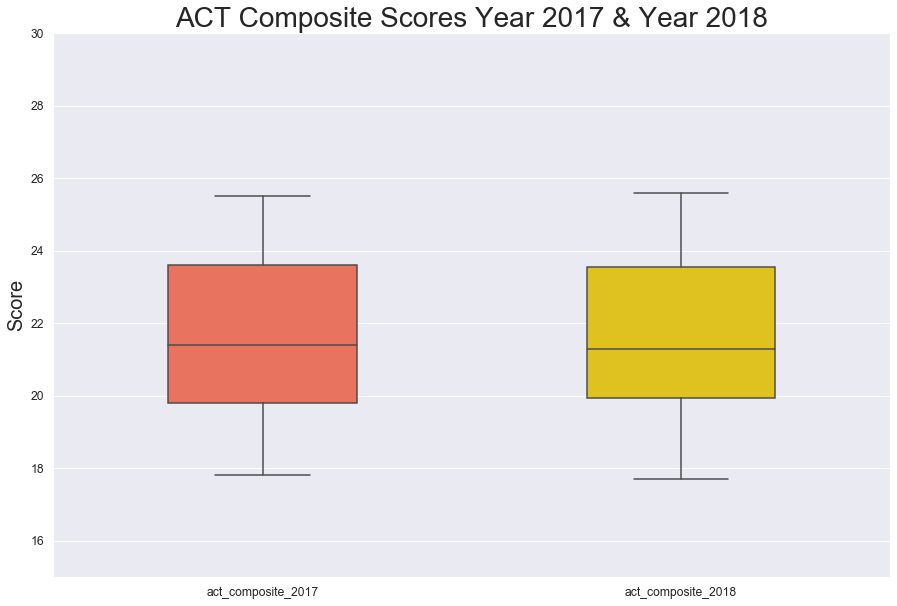

In [92]:
ax = plt.subplots(figsize=(15,10))
plt.title('ACT Composite Scores Year 2017 & Year 2018',fontsize=28)
plt.ylabel('Score',fontsize=20)
plt.ylim(15, 30)
box_col = {'act_composite_2017': 'tomato', 'act_composite_2018': 'gold'}
sns.boxplot(data=final[['act_composite_2017','act_composite_2018']],width=0.45,palette=box_col);

>**Analysis :**<br>
Comparing the ACT composite scores year 2017 and year 2018, the overall performance looks consistent. 25th percentile and maximum had increased slightly while minimum had dipped a little in the same year (year 2018).<br>
<br>


**SAT vs ACT Year 2017**

Text(0, 0.5, '')

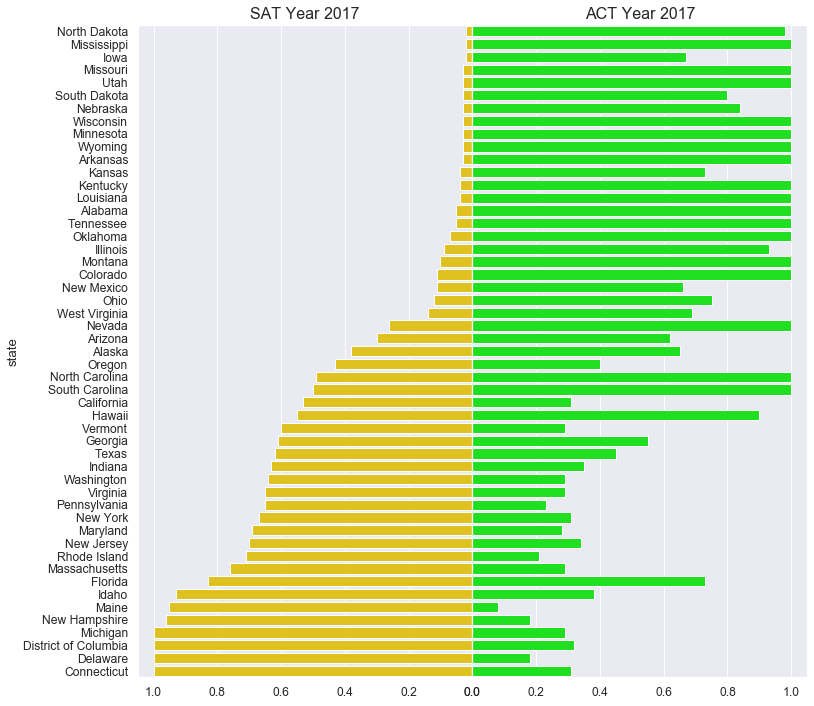

In [93]:
fig, ax = plt.subplots(1,2,figsize=(12, 12),sharey=True) 
plt.subplots_adjust(wspace=0.)


final = final.sort_values(by='sat_participation_2017',ascending=True)
sns.barplot(y='state', x='sat_participation_2017',data=final,color='gold',ax=ax[0],orient ='h')
ax[0].set_title('SAT Year 2017',fontsize=16)
ax[0].set_xlabel('')
ax[0].invert_xaxis()

sns.barplot(y='state', x='act_participation_2017',data=final,color='lime',ax=ax[1],orient='h')
ax[1].set_title('ACT Year 2017',fontsize=16)
ax[1].set_xlabel('')
ax[1].set_ylabel(None)

>**Analysis :**<br>
Comparing the participation rate for both ACT and SAT test in year 2017 with table plotted above, we can clearly see which test is required in that particular states, there are more states that having 100% participation rate in ACT test comparing with SAT test.<br>
<br>
The states like Missisippi,Iowa,Missouri which has higher participation rate in ACT comparing with SAT test which have obviously lower participation rate, and states like Connecticut, Delaware,District Of Columbia were having high participation rate in SAT,but around 15-30% the students in the state did not just focused on the SAT test but they took part in the ACT test too.


**SAT vs ACT Year 2018**

Text(0, 0.5, '')

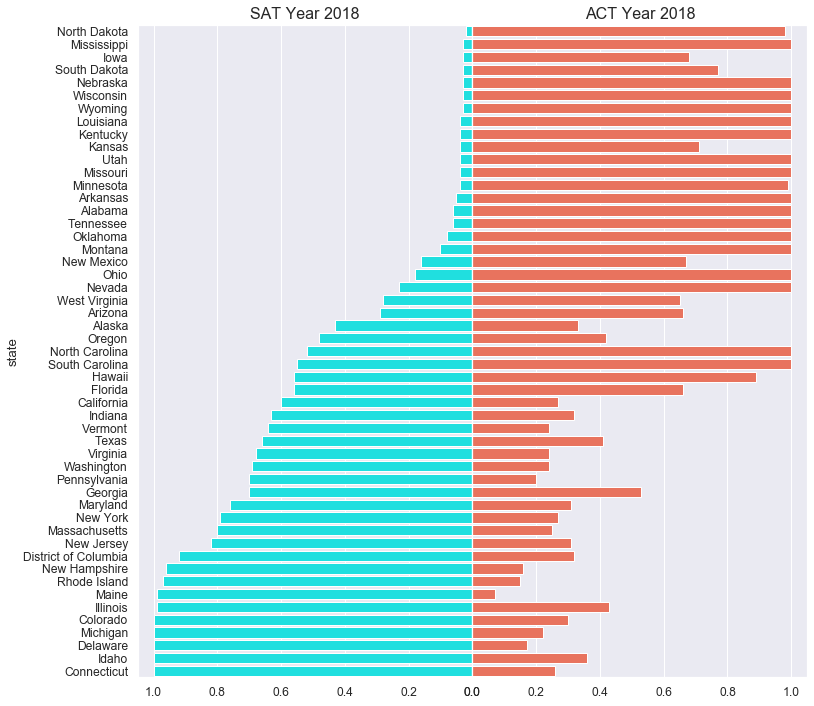

In [94]:
fig, ax = plt.subplots(1,2,figsize=(12, 12),sharey=True) 
plt.subplots_adjust(wspace=0.0)


final = final.sort_values(by='sat_participation_2018',ascending=True)
sns.barplot(y='state', x='sat_participation_2018',data=final,color='aqua',ax=ax[0],orient ='h')
ax[0].set_title('SAT Year 2018',fontsize=16)
ax[0].set_xlabel('')
ax[0].invert_xaxis()

sns.barplot(y='state', x='act_participation_2018',data=final,color='tomato',ax=ax[1],orient='h')
ax[1].set_title('ACT Year 2018',fontsize=16)
ax[1].set_xlabel('')
ax[1].set_ylabel(None)

>**Analysis :**<br>
The participation rate for both ACT and SAT test in year 2018 with table plotted above, similar to year 2017 each of the states have their own preferrable test, and there is a slight increase of rate of partition in SAT test comparing with year 2017.
<br>
The states like Missisippi,Iowa,Missouri still having higher participation rate in ACT comparing with SAT test but notably that there are slightly increase of rate of partition in SAT test.


## Correlation of Verbal / Reading vs Maths For ACT & SAT Year 2017 & 2018

Text(0, 0.5, 'SAT Math')

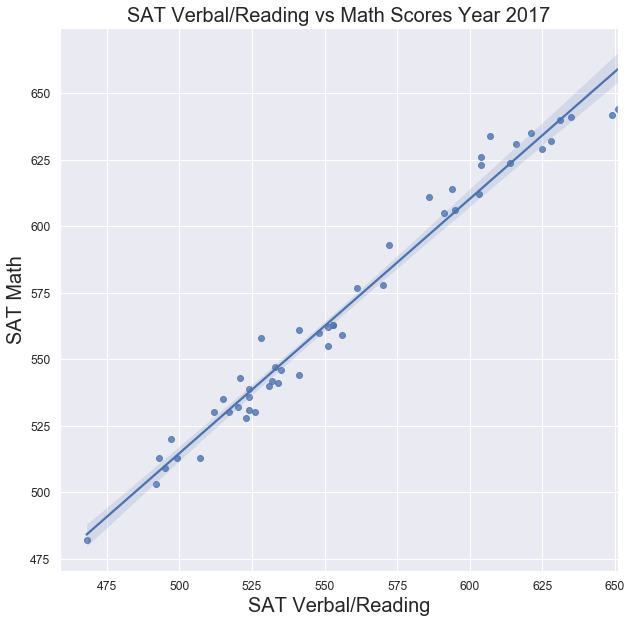

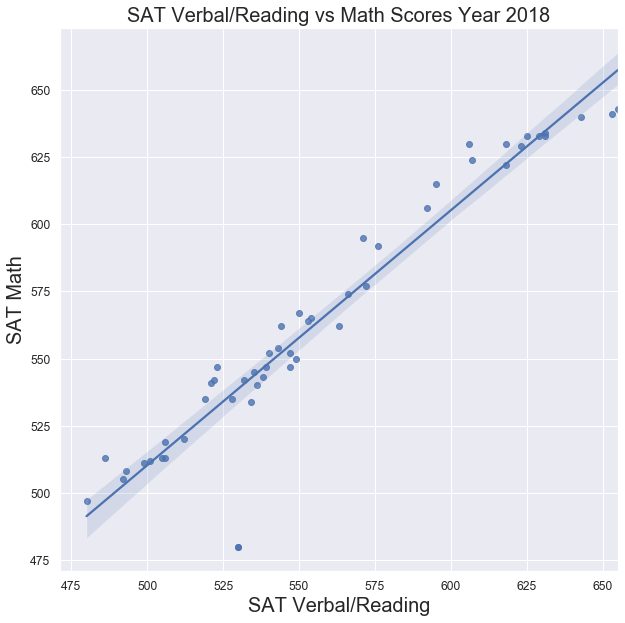

In [95]:
ax = plt.subplots(figsize=(10,10))
ax = sns.regplot(y='sat_erw_2017', x='sat_math_2017', data=final[['sat_erw_2017','sat_math_2017']])
ax.set_title('SAT Verbal/Reading vs Math Scores Year 2017',fontsize=20)
ax.set_xlabel('SAT Verbal/Reading',fontsize=20)
ax.set_ylabel('SAT Math',fontsize=20)

ax = plt.subplots(figsize=(10,10))
ax = sns.regplot(y='sat_erw_2018', x='sat_math_2018', data=final[['sat_erw_2018','sat_math_2018']])
ax.set_title('SAT Verbal/Reading vs Math Scores Year 2018',fontsize=20)
ax.set_xlabel('SAT Verbal/Reading',fontsize=20)
ax.set_ylabel('SAT Math',fontsize=20)

Text(0, 0.5, 'ACT Math')

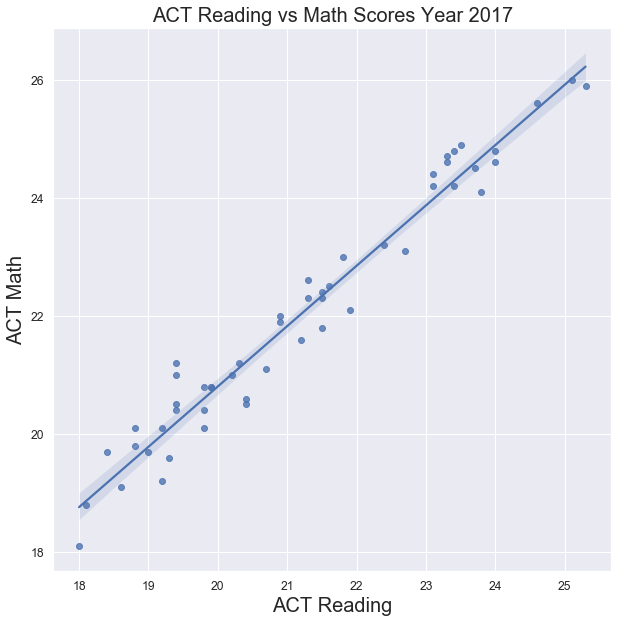

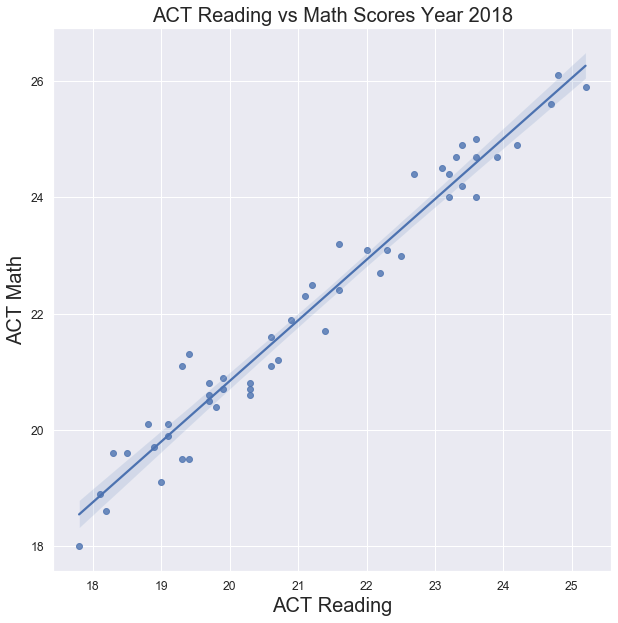

In [96]:
ax = plt.subplots(figsize=(10,10))
ax = sns.regplot(y='act_reading_2017', x='act_math_2017', data=final[['act_reading_2017','act_math_2017']])
ax.set_title('ACT Reading vs Math Scores Year 2017',fontsize=20)
ax.set_xlabel('ACT Reading',fontsize=20)
ax.set_ylabel('ACT Math',fontsize=20)

ax = plt.subplots(figsize=(10,10))
ax = sns.regplot(y='act_reading_2018', x='act_math_2018', data=final[['act_reading_2018','act_math_2018']])
ax.set_title('ACT Reading vs Math Scores Year 2018',fontsize=20)
ax.set_xlabel('ACT Reading',fontsize=20)
ax.set_ylabel('ACT Math',fontsize=20)

## Correlation of Reading vs Science For ACT Year 2017 & 2018

Text(0, 0.5, 'ACT Science')

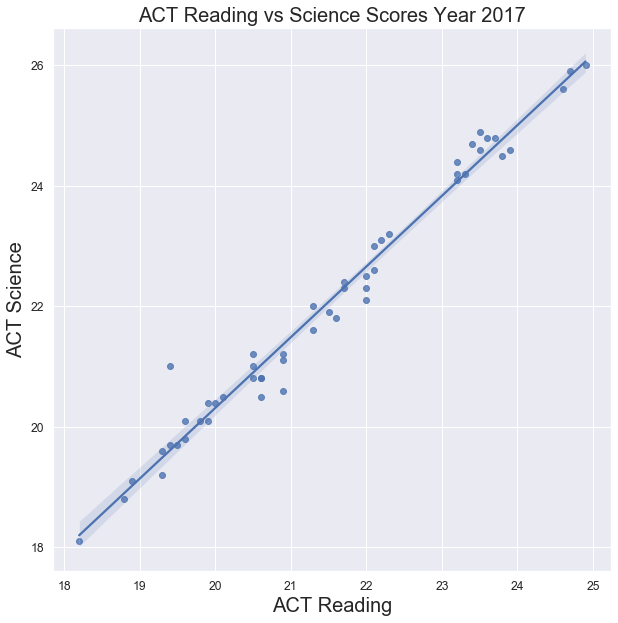

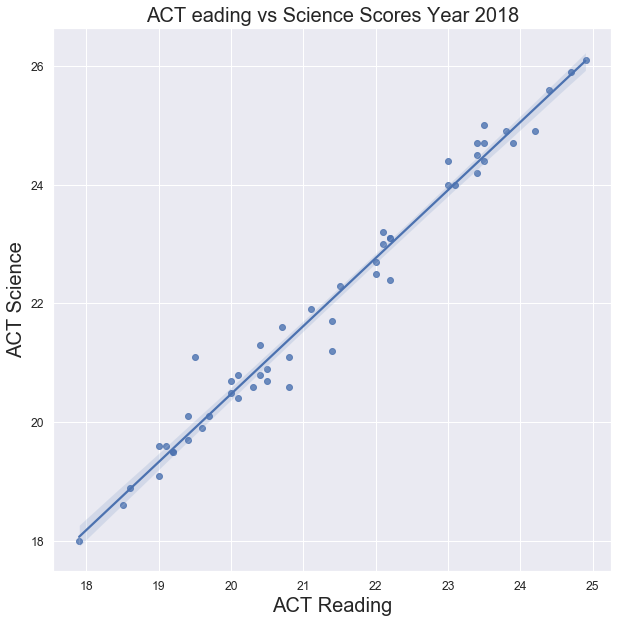

In [97]:
ax = plt.subplots(figsize=(10,10))
ax = sns.regplot(y='act_reading_2017', x='act_science_2017', data=final[['act_reading_2017','act_science_2017']])
ax.set_title('ACT Reading vs Science Scores Year 2017',fontsize=20)
ax.set_xlabel('ACT Reading',fontsize=20)
ax.set_ylabel('ACT Science',fontsize=20)

ax = plt.subplots(figsize=(10,10))
ax = sns.regplot(y='act_reading_2018', x='act_science_2018', data=final[['act_reading_2018','act_science_2018']])
ax.set_title('ACT eading vs Science Scores Year 2018',fontsize=20)
ax.set_xlabel('ACT Reading',fontsize=20)
ax.set_ylabel('ACT Science',fontsize=20)

## Correlation of Reading vs English For ACT Year 2017 & 2018

Text(0, 0.5, 'ACT English')

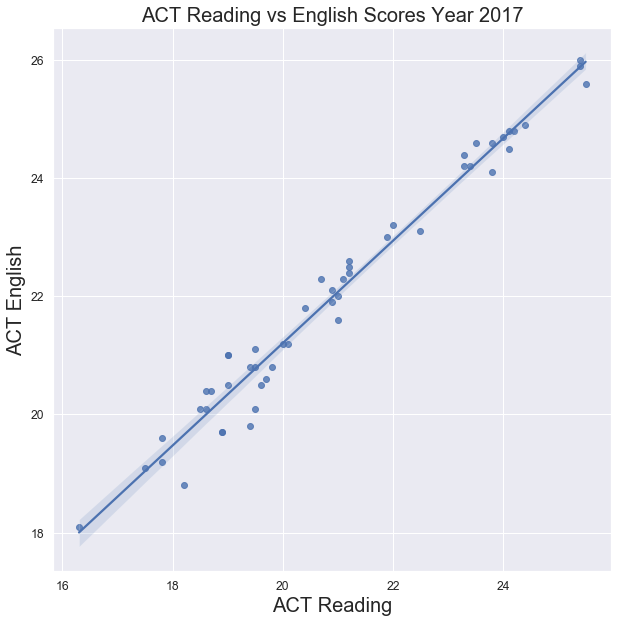

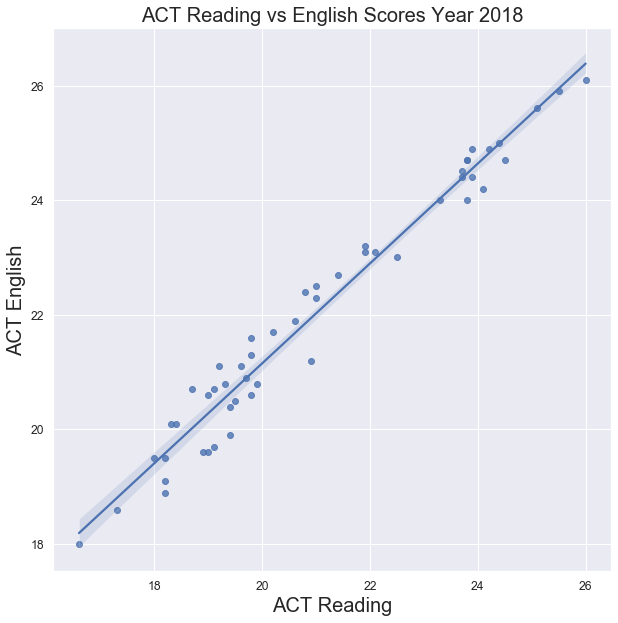

In [98]:
ax = plt.subplots(figsize=(10,10))
ax = sns.regplot(y='act_reading_2017', x='act_english_2017', data=final[['act_reading_2017','act_english_2017']])
ax.set_title('ACT Reading vs English Scores Year 2017',fontsize=20)
ax.set_xlabel('ACT Reading',fontsize=20)
ax.set_ylabel('ACT English',fontsize=20)

ax = plt.subplots(figsize=(10,10))
ax = sns.regplot(y='act_reading_2018', x='act_english_2018', data=final[['act_reading_2018','act_english_2018']])
ax.set_title('ACT Reading vs English Scores Year 2018',fontsize=20)
ax.set_xlabel('ACT Reading',fontsize=20)
ax.set_ylabel('ACT English',fontsize=20)

>**Analysis :**<br>
In common, the student who doing well in language test tend to do poor in Math and Science.
<br>
So refering to above comparing Verbal/Reading to Math we can said that the fact is true as the correlation between this 2 subject is positively correlated.
<br>
For Verbal/Reading vs Science, the correlation in year 2017 is slightly less positive than year 2018 yet we can said that the fact student who do well in language test tend to do poor in Science.
<br>
While for Verbal/Reading vs English, even though both are language papers, but the Verbal/Reading is more in comprehension while the English is about grammars and spelling. The correlation between this 2 subject is positively correlated means that student who can read and speak well does not mean that he/she will do well in English grammar or speling.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

Year 2017            |  Year 2018
:-------------------------:|:-------------------------:
![image](../image/act_2017.png) | ![image](../image/act_2018.png)<br>
[ACT 2017](../image/act_2017.png) |[ACT 2018](../image/act_2018.png)
![image](../image/sat_2017.png) | ![image](../image/sat_2018.png)
[SAT 2017](../image/sat_2017.png) |[SAT 2018](../image/sat_2018.png)

>Please click the link below for picture of each. <br>
Refer to [link](https://public.tableau.com/profile/song.yuan2119#!/vizhome/SATP_Rate2017/Sheet4) here for the tableu mapping on web.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [99]:
final.describe()

,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2017,sat_erw_2017,sat_math_2017,sat_total_2017,act_participation_2018,act_composite_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,sat_participation_2018,sat_erw_2018,sat_math_2018,sat_total_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.652549,20.931373,21.182353,22.013725,21.450980,21.518627,0.398039,569.117647,556.882353,1126.098039,0.616471,21.486275,20.988235,21.125490,22.015686,21.345098,0.457451,563.686275,556.235294,1120.019608
std,0.321408,2.353677,1.981989,2.067271,1.739353,2.021360,0.352766,45.666901,47.121395,92.494812,0.340810,2.106278,2.446356,2.035765,2.167245,1.870114,0.373143,47.502627,47.772623,94.155083
min,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,482.000000,468.000000,950.000000,0.070000,17.700000,16.600000,17.800000,18.000000,17.900000,0.020000,480.000000,480.000000,977.000000
25%,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.040000,533.500000,523.500000,1055.500000,0.285000,19.950000,19.100000,19.400000,20.450000,19.850000,0.045000,534.500000,522.500000,1057.500000
50%,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.380000,559.000000,548.000000,1107.000000,0.660000,21.300000,20.200000,20.700000,21.600000,21.100000,0.520000,552.000000,544.000000,1098.000000
75%,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,0.660000,613.000000,599.000000,1212.000000,1.000000,23.550000,23.700000,23.150000,24.100000,23.050000,0.775000,610.500000,593.500000,1204.000000
max,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,644.000000,651.000000,1295.000000,1.000000,25.600000,26.000000,25.200000,26.100000,24.900000,1.000000,643.000000,655.000000,1298.000000


>Answers:<br>
<br>
**Partipation Rates**<br>
The ACT participation rates are higher than SAT participation rate in year 2017. SAT 2017, ACT 2017 and ACT 2018 were having identical spreads, however SAT 2018 is left skewed. So by comparing the box plot and histogram above, the former 3 test were not normally distributed despite thier boxplots are quite similar.<br>
<br>
**English Verbal and Reading Score**<br>
Overall the verbal and reading scores in both test are better Others. Notably comparing with English scores.<br>
In year 2017 both the reading and English mean were close and the spread is closers comparing to year 2018 which spread remain narrow but mean score were increase slightly for both reading and English scores.<br>
<br>
**Math Score**<br>
For SAT test, the mean and median are close for both years and the soread is narrow and skewed to the left. For ACT test, similar to SAT the mean and median are close and spread is norrow too.<br>
<br>
**Science Score**<br>
Comparing both years score, ACT Science are nrrow amd symmetrical even though there is sligly wider spread in year 2018. Mean of the Science has slightly increased comparing to year 2017.<br>
<br>
**Composite/Total Score**<br>
The participation rate were increase overall for both ACT and SAT test amd the average of the score for both test have slight decrease.


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

>**Answer:**<br>
Based on observation on histogram it appears that the participation rates are not normally distributed which is due to the state requirement which cause extremely high and low participation on both ACT and SAT test.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

>**Answer:**<br>
As mentioned above, the participation rate are not normally distributed.<br>
<br>
For math and reading are more normally distributed but the shape still yet skewed either to left or right and the peaks did not lied on central.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

>**Answer:**<br>
If the variables are comparable we can conduct the statistical inference. For example, 2017 SAT math and 2018 SAT math which can be assume to having similar distribution as histogramw shown.

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

>**Answer:**<br>
<br>
It is not appropriate to campare SAT and ACT score because both test are on different scales which SAT score reange is from 200 to 800 while for ACT, score range is from 1 to 36 making it is not possible to conduct statiscal inference from the maths scores.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Experiment : SAT Math Year 2017 vs Year 2018

>**H0**: There is no difference comparing SAT Math Year 2017 and SAT Math Year 2018<br>
**H1**: There is difference comparing SAT Math Year 2017 and SAT Math Year 2018<br>


Value of significance, α = 0,05

In [100]:
sat_math_2017 = final['sat_math_2017'].to_numpy()
sat_math_2018 = final['sat_math_2018'].to_numpy()

In [101]:
import scipy.stats as stats
result = stats.ttest_ind(sat_math_2017, sat_math_2018)
result.statistic, result.pvalue

(0.06886440276247592, 0.9452350680711727)

>**Answer:**<br>
<br>
P = 0.945235<br>
Since the Value of significance, p value is greater than α, we can reject the null hypothesis, conclude that there is not statiscal difference of SAT Math between year 2017 and uear 2018

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [102]:
final = final.sort_values(by='state',ascending=True)
final_r = final[[
    'state',
    'sat_participation_2017', 'sat_participation_2018',
    'act_participation_2017', 'act_participation_2018', 
    'sat_erw_2017', 'sat_erw_2018',
    'act_reading_2017', 'act_reading_2018',
    'act_english_2017', 'act_english_2018', 
    'sat_math_2017', 'sat_math_2018',
    'act_math_2017', 'act_math_2018',
    'act_science_2017', 'act_science_2018',
    'sat_total_2017' , 'sat_total_2018',
    'act_composite_2017', 'act_composite_2018'
    ]]
final_r.head(10)

,state,sat_participation_2017,sat_participation_2018,act_participation_2017,act_participation_2018,sat_erw_2017,sat_erw_2018,act_reading_2017,act_reading_2018,act_english_2017,...,sat_math_2017,sat_math_2018,act_math_2017,act_math_2018,act_science_2017,act_science_2018,sat_total_2017,sat_total_2018,act_composite_2017,act_composite_2018
0,Alabama,0.05,0.06,1.00,1.00,593.0,595.0,19.7,19.6,18.9,...,572.0,571.0,18.4,18.3,19.4,19.0,1165.0,1166.0,19.2,19.1
1,Alaska,0.38,0.43,0.65,0.33,547.0,562.0,20.4,21.6,18.7,...,533.0,544.0,19.8,20.6,19.9,20.7,1080.0,1106.0,19.8,20.8
2,Arizona,0.30,0.29,0.62,0.66,563.0,577.0,20.1,19.5,18.6,...,553.0,572.0,19.8,19.4,19.8,19.2,1116.0,1149.0,19.7,19.2
3,Arkansas,0.03,0.05,1.00,1.00,614.0,592.0,19.7,19.7,18.9,...,594.0,576.0,19.0,18.9,19.5,19.4,1208.0,1169.0,19.4,19.4
4,California,0.53,0.60,0.31,0.27,531.0,540.0,23.1,23.0,22.5,...,524.0,536.0,22.7,22.5,22.2,22.1,1055.0,1076.0,22.8,22.7
5,Colorado,0.11,1.00,1.00,0.30,606.0,519.0,21.2,24.4,20.1,...,595.0,506.0,20.3,23.2,20.9,23.5,1201.0,1025.0,20.8,23.9
6,Connecticut,1.00,1.00,0.31,0.26,530.0,535.0,25.6,26.1,25.5,...,512.0,519.0,24.6,24.8,24.6,24.9,1041.0,1053.0,25.2,25.6
7,Delaware,1.00,1.00,0.18,0.17,503.0,505.0,24.8,24.5,24.1,...,492.0,492.0,23.4,23.1,23.6,23.4,996.0,998.0,24.1,23.2
8,District of Columbia,1.00,0.92,0.32,0.32,482.0,497.0,24.9,24.4,24.4,...,468.0,480.0,23.5,22.7,23.5,23.0,950.0,977.0,24.2,23.6
9,Florida,0.83,0.56,0.73,0.66,520.0,550.0,21.0,21.1,19.0,...,497.0,549.0,19.4,19.3,19.4,19.5,1017.0,1099.0,19.8,19.9


>Colorado's department of Education have chose SAT as their required standard college admission test after holding bid for college admission, according to [chalkbeat.org]('https://chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/'). Which contribute to increasing spike of participation rate of SAT from 11% to 100% !, and resulting ACT participation rate took a dive from 100% to 30%.

In [103]:
final_r.iloc[11:20]

,state,sat_participation_2017,sat_participation_2018,act_participation_2017,act_participation_2018,sat_erw_2017,sat_erw_2018,act_reading_2017,act_reading_2018,act_english_2017,...,sat_math_2017,sat_math_2018,act_math_2017,act_math_2018,act_science_2017,act_science_2018,sat_total_2017,sat_total_2018,act_composite_2017,act_composite_2018
11,Hawaii,0.55,0.56,0.90,0.89,544.0,480.0,19.2,19.1,17.8,...,541.0,530.0,19.2,19.0,19.3,19.0,1085.0,1010.0,19.0,18.9
12,Idaho,0.93,1.00,0.38,0.36,513.0,508.0,23.0,23.2,21.9,...,493.0,493.0,21.8,21.6,22.1,22.1,1005.0,1001.0,22.3,22.3
13,Illinois,0.09,0.99,0.93,0.43,559.0,513.0,21.6,24.2,21.0,...,556.0,506.0,21.2,23.4,21.3,23.4,1115.0,1019.0,21.4,23.9
14,Indiana,0.63,0.63,0.35,0.32,542.0,542.0,23.2,23.1,22.0,...,532.0,532.0,22.4,22.3,22.3,22.2,1074.0,1074.0,22.6,22.5
15,Iowa,0.02,0.03,0.67,0.68,641.0,634.0,22.6,22.5,21.2,...,635.0,631.0,21.3,21.2,22.1,22.0,1275.0,1265.0,21.9,21.8
16,Kansas,0.04,0.04,0.73,0.71,632.0,633.0,22.3,22.3,21.1,...,628.0,631.0,21.3,21.1,21.7,21.5,1260.0,1265.0,21.7,21.6
17,Kentucky,0.04,0.04,1.00,1.00,631.0,630.0,20.5,20.8,19.6,...,616.0,618.0,19.4,19.7,20.1,20.1,1247.0,1248.0,20.0,20.2
18,Louisiana,0.04,0.04,1.00,1.00,611.0,615.0,19.8,19.6,19.4,...,586.0,595.0,18.8,18.5,19.6,19.1,1198.0,1210.0,19.5,19.2
19,Maine,0.95,0.99,0.08,0.07,513.0,512.0,24.8,24.7,24.2,...,499.0,501.0,24.0,23.6,23.7,23.4,1012.0,1013.0,24.3,24.0


>Illinois State Board of Education announced to witch from ACT to SAT test as all high school graduates requirement. SAT participation increased from 9% to 99% from year 2017 to 2018 while ACT participation dive from 93% to 43%. *source* [from Chicago Tribune]('https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html')

In [104]:
final_r.iloc[31:40]

,state,sat_participation_2017,sat_participation_2018,act_participation_2017,act_participation_2018,sat_erw_2017,sat_erw_2018,act_reading_2017,act_reading_2018,act_english_2017,...,sat_math_2017,sat_math_2018,act_math_2017,act_math_2018,act_science_2017,act_science_2018,sat_total_2017,sat_total_2018,act_composite_2017,act_composite_2018
31,New Mexico,0.11,0.16,0.66,0.67,577.0,552.0,20.4,20.1,18.6,...,561.0,540.0,19.4,19.1,20.0,19.7,1138.0,1093.0,19.7,19.4
32,New York,0.67,0.79,0.31,0.27,528.0,534.0,24.6,24.9,23.8,...,523.0,534.0,24.0,24.2,23.9,24.2,1052.0,1068.0,24.2,24.5
33,North Carolina,0.49,0.52,1.00,1.00,546.0,554.0,19.6,19.5,17.8,...,535.0,543.0,19.3,19.3,19.3,19.2,1081.0,1098.0,19.1,19.1
34,North Dakota,0.02,0.02,0.98,0.98,635.0,640.0,20.5,20.7,19.0,...,621.0,643.0,20.4,20.3,20.6,20.5,1256.0,1283.0,20.3,20.3
35,Ohio,0.12,0.18,0.75,1.00,578.0,552.0,22.5,20.8,21.2,...,570.0,547.0,21.6,20.3,22.0,20.4,1149.0,1099.0,22.0,20.3
36,Oklahoma,0.07,0.08,1.00,1.00,530.0,541.0,20.1,20.1,18.5,...,517.0,521.0,18.8,18.8,19.6,19.4,1047.0,1062.0,19.4,19.3
37,Oregon,0.43,0.48,0.40,0.42,560.0,564.0,22.4,21.9,21.2,...,548.0,553.0,21.5,20.9,21.7,21.1,1108.0,1117.0,21.8,21.3
38,Pennsylvania,0.65,0.70,0.23,0.20,540.0,547.0,24.2,24.0,23.4,...,531.0,539.0,23.4,23.2,23.3,23.1,1071.0,1086.0,23.7,23.5
39,Rhode Island,0.71,0.97,0.21,0.15,539.0,513.0,24.7,25.0,24.0,...,524.0,505.0,23.3,23.6,23.4,23.5,1062.0,1018.0,24.0,24.2


>Ohio state have both ACT and SAT participation rate increase from year 2017 to year 2018. Former increased from 75% to 100% while SAT having slight increment from 12% to 18%. The rate increase due to the requirement changed that high school need to take either the ACT or SAt from 2017 onwards. *source* [from Dispatch.com]('https://www.dispatch.com/news/20170228/ohio-schools-must-now-give-act-or-sat-to-all-juniors')

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

**Key Takeaways**<br>
- Based on the data from year 2017 to 2018 for both ACT and SAT,the state education department had made decision to change their education policies and requirement which lead to relative huge changes in ACT and SAT participation rate for each states. From the example of outside research, we also found that implementation of new policies are usually correlated to competition between ACT and SAT by bidding in this case.<br>
<br>
- For the case in Colorado and Illinois state, both state's department of education had implemented SAT as their compulsory requirement for all high school student in the state. Which is the fact that contributed to extreme increment in SAT participation rate and nosedive in participation rate of ACT.<br>
<br>
- Ohio state had made either ACT or SAT were compulsory for each high school students. This resulted both test participation rate to increase.<br>
<br>
- Overall SAT scores improved in year 2018 despite the higher participation rate comparing to previous year, while ACT score remain level.<br>
<br>
- The cost of SAT test is relatively high comparing to ACT test which might affect the budget focus administrators.<br>
<br>

**Recommendation**<br>
- To target the states which are yet to confirm and review local college admissions provider policies.<br>
<br>
- Lower the test cost in order to lighten the lower income family to bear the test cost by introduce waivers or subsidy.<br>
<br>
- Create workshops or seminar to increase the student interest on the test and have them well prepared for the test by showcase them the improvement of SAT test year to year.<br>
<br>
- Increase the interest of student to take part in the test by engaging local department of education to offer discounted price.<br>
<br>

**Conclusion**<br>
In order to have more accurate in investigation, we may look into addtional data such as the headcount of the total student participated in the test for each states and that would be interesting to have the university admission criteria for each state which will affect the participation rate for each test.